In [ ]:
!pip install pandas matplotlib seaborn wordcloud
!pip install --upgrade pip
!pip install koreanize-matplotlib
!pip install plotly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 사용자 폰트 경로
user_font_path = "/content/drive/MyDrive/25-1/공모전/a고딕16.ttf"

# 시스템 폰트 경로로 복사
shutil.copy(user_font_path, "/usr/share/fonts/truetype/a고딕16.ttf")

# matplotlib이 인식하도록 FontProperties 객체로 직접 등록
font_prop = fm.FontProperties(fname="/usr/share/fonts/truetype/a고딕16.ttf")

# 폰트 이름 확인
font_name = font_prop.get_name()
print("📌 실제 인식된 폰트 이름:", font_name)

# 전역 설정에 반영
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False


📌 실제 인식된 폰트 이름: KoreanGD16R


In [ ]:
import pandas as pd

# CSV 불러오기
data = pd.read_csv("/content/drive/MyDrive/25-1/공모전/직업_추가.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9828 entries, 0 to 9827
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   post_id    9828 non-null   int64  
 1   제목         9776 non-null   object 
 2   내용         9824 non-null   object 
 3   작성일        9808 non-null   object 
 4   해시태그       3226 non-null   object 
 5   이직_원인_후보   9828 non-null   object 
 6   TFIDF_키워드  9828 non-null   object 
 7   이직확률       9828 non-null   float64
 8   tag        9826 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 691.2+ KB


In [ ]:
import pandas as pd
import ast
from collections import Counter

# --- 핵심 함수 정의 ---
def top_keywords(df_group, col, top_n=10):
    """문자열 형태의 리스트 컬럼을 빈도 기반 상위 n개로 요약"""
    all_keywords = []
    for val in df_group[col]:
        try:
            all_keywords.extend(ast.literal_eval(val))
        except:
            continue
    return [kw for kw, _ in Counter(all_keywords).most_common(top_n)]

# --- 메인 요약 함수 ---
def summarize_by_tag(df):
    summary = []
    for tag, group in df.groupby("tag"):
        summary.append({
            "tag": tag,
            "avg_이직확률": group["이직확률"].mean(),
            "top_TFIDF_키워드": top_keywords(group, "TFIDF_키워드"),
            "top_이직_원인_후보": top_keywords(group, "이직_원인_후보"),
        })
    return pd.DataFrame(summary)



result = summarize_by_tag(data)
print(result.head())


        tag  avg_이직확률                                   top_TFIDF_키워드  \
0        SW  0.543533  [개발, 개발자, 엔드, 프론트, 회사, 프로젝트, 연봉, 퍼블리셔, 공부, 자바]   
1     건축·설비  0.455881      [인테리어, 품질, 건축, 설계, 현장, 회사, 시공, 관리, 기사, 토목]   
2  공기업·공공기관  0.413880    [공공, 기사, 건축, 기관, 떨어지, 공무, 건설, 프로젝트, 계약직, 나중]   
3  광고·홍보·전시  0.475854   [마케팅, 디자인, 광고, 마케터, 대행사, 연봉, 회사, 기획, 업무, 콘텐츠]   
4        교육  0.424143     [학원, 강사, 교사, 교육, 원장, 유치원, 영어, 어린이집, 유아, 보육]   

                                top_이직_원인_후보  
0   [경력, 연봉, 업무, 기업, 배우, 지원, 근무, 공부, 개발, 경험]  
1  [경력, 업무, 연봉, 자격증, 관리, 기업, 근무, 배우, 직무, 지원]  
2  [경력, 연봉, 업무, 관리, 근무, 직장, 지원, 자격증, 전공, 배우]  
3  [경력, 업무, 연봉, 근무, 기업, 지원, 직무, 디자인, 경험, 직장]  
4  [경력, 근무, 업무, 직장, 자격증, 지원, 사람, 학원, 연봉, 직무]  


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tag            38 non-null     object 
 1   avg_이직확률       38 non-null     float64
 2   top_TFIDF_키워드  38 non-null     object 
 3   top_이직_원인_후보   38 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
result.sort_values("avg_이직확률", ascending=False)

,tag,avg_이직확률,top_TFIDF_키워드,top_이직_원인_후보
25,인테리어·자재,0.549345,"[인테리어, 현장, 설계, 실내, 상업, 공간, 건축, 취업, 목공, 디자인]","[배우, 경력, 디자인, 근무, 업무, 사람, 연봉, 지원, 전공, 도움]"
0,SW,0.543533,"[개발, 개발자, 엔드, 프론트, 회사, 프로젝트, 연봉, 퍼블리셔, 공부, 자바]","[경력, 연봉, 업무, 기업, 배우, 지원, 근무, 공부, 개발, 경험]"
6,디자인·CAD,0.525709,"[디자인, 디자이너, 회사, 연봉, 에이전시, 인테리어, 포트폴리오, 면접, 브랜드...","[경력, 디자인, 업무, 연봉, 근무, 기업, 배우, 디자이너, 직장, 사람]"
31,출판·인쇄·사진,0.509656,"[디자인, 회사, 영상, 연봉, 디자이너, 준비, 편집, 편집디자인, 작가, 출판사]","[경력, 업무, 디자인, 근무, 연봉, 지원, 배우, 사람, 기업, 직장]"
37,회계·세무·법무,0.507509,"[회계, 세무, 법인, 업무, 사무실, 전산, 세무사, 기업, 재무, 사무소]","[경력, 업무, 기업, 자격증, 근무, 연봉, 지원, 배우, 관리, 중소기업]"
36,화학·에너지·환경,0.504241,"[환경, 기사, 안전, 수질, 대기, 직무, 화학, 측정, 가스, 공정]","[경력, 기업, 업무, 자격증, 근무, 직무, 연봉, 경험, 지원, 공부]"
21,영업관리·기타,0.501658,"[영업, 관리, 회사, 직장, 직급, 희망, 마지막, 매출, 쌓이, 성장]","[업무, 근무, 경력, 사람, 직장, 관리, 연봉, 중소기업, 채용, 배우]"
8,방송·케이블·프로덕션,0.497022,"[영상, 촬영, 편집, 방송국, 프로덕션, 조연출, 편집자, 회사, 방송, 피디]","[경력, 근무, 업무, 기업, 연봉, 지원, 경험, 사람, 배우, 분야]"
7,무역·물류·배송,0.491733,"[무역, 해외, 물류, 영업, 구매, 포워딩, 업무, 지게차, 회사, 직무]","[경력, 업무, 근무, 기업, 연봉, 지원, 관리, 직무, 자격증, 직장]"
17,솔루션·SI·CRM·ERP,0.489123,"[설계, 엔지니어, 보안, 전기, 네트워크, 개발, 기사, 클라우드, 회사, 취업]","[경력, 업무, 기업, 근무, 연봉, 지원, 자격증, 직무, 배우, 사람]"


In [ ]:
import plotly.express as px

# 💡 1. 시각화할 산업 리스트 정의
selected_tags = ['SW',
 '건축·설비',
 '공기업·공공기관',
 '교육',
 '디자인·CAD',
 '백화점·유통·도소매',
 '부동산·중개·임대',
 '뷰티·미용',
 '사회복지·요양',
 '연예·엔터테인먼트',
 '은행·금융',
 '음식료·외식·프랜차이즈',
 '의료(간호·원무·상담)',
 '인테리어·자재',
 '전자·기계',
 '출판·인쇄·사진',
 '호텔·여행·항공',
 '회계·세무·법무']  # 원하는 산업으로 수정 가능

# 💡 2. 해당 산업만 필터링
df_sorted = result.sort_values("avg_이직확률", ascending=False)
df_filtered = df_sorted[df_sorted["tag"].isin(selected_tags)]

# 💡 3. 바 차트 생성
fig = px.bar(
    df_filtered,
    x="avg_이직확률",
    y="tag",
    orientation="h",
    title="<b>선택 산업별 평균 이직확률</b>",
    color="avg_이직확률",
    color_continuous_scale="blugrn",
    template="plotly_white",
    text=df_filtered["avg_이직확률"].apply(lambda x: f"{x*100:.1f}%")
)

# 💡 4. 스타일 및 시각적 커스터마이징
fig.update_traces(
    textposition="outside",
    textfont=dict(size=16, color='black')
)

fig.update_layout(
    yaxis=dict(
        autorange="reversed",
        title="",
        tickfont=dict(size=16)
    ),
    xaxis=dict(
        range=[0.3, 0.6],
        title="평균 이직확률",
        titlefont=dict(size=20),
        tickfont=dict(size=18),
        showgrid=True,
        gridcolor="lightgray",
        tickformat=".0%"  # ✅ x축 눈금을 퍼센트로 표시
    ),
    font=dict(
        family="Malgun Gothic",
        size=18
    ),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="white",
    margin=dict(l=100, r=40, t=70, b=50),
    height=700
)

fig.update_coloraxes(
    colorbar=dict(
        title="이직확률",         # ✅ 컬러바 제목 수정
        tickformat=".0%",        # ✅ 퍼센트로 포맷팅
        tickfont=dict(size=14, family="Malgun Gothic"),  # ✅ 폰트 통일
        titlefont=dict(size=16, family="Malgun Gothic")
    )
)



fig.show()

In [ ]:
import plotly.graph_objects as go

df_filtered = df_sorted[df_sorted["avg_이직확률"] >= 0.3]

fig = go.Figure()

# 선 (스틱)
fig.add_trace(go.Scatter(
    x=df_filtered["avg_이직확률"],
    y=df_filtered["tag"],
    mode='lines',
    line=dict(color='lightgray', width=2),
    showlegend=False
))

# 동그라미 (막대 끝 점)
fig.add_trace(go.Scatter(
    x=df_filtered["avg_이직확률"],
    y=df_filtered["tag"],
    mode='markers+text',
    marker=dict(size=14, color='royalblue'),
    text=df_filtered["avg_이직확률"].round(2),
    textposition='middle right',
    textfont=dict(size=14, color='black', family="Malgun Gothic"),
    showlegend=False
))

fig.update_layout(
    title="<b>산업별 평균 이직확률 (Lollipop Chart)</b>",
    xaxis=dict(title="평균 이직확률", range=[0.3, 0.6]),
    yaxis=dict(autorange="reversed", title=""),
    font=dict(family="Malgun Gothic", size=16),
    margin=dict(l=100, r=40, t=70, b=50),
    height=700,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


In [ ]:
from wordcloud import WordCloud

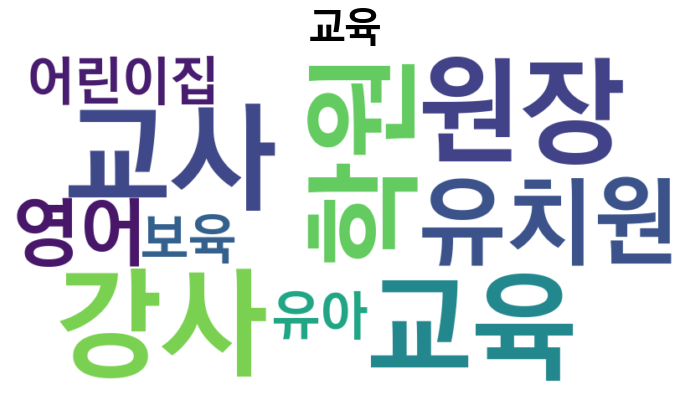

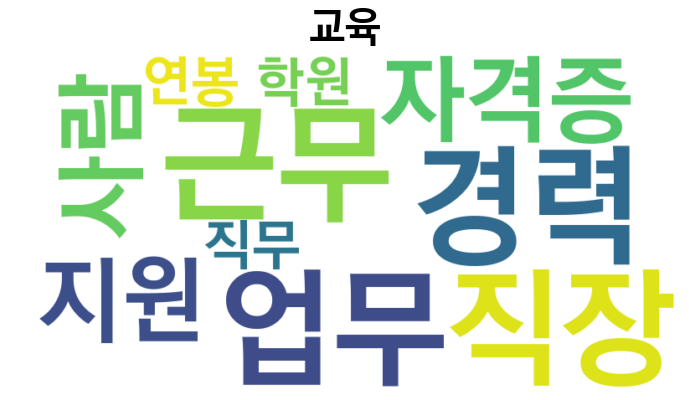

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 폰트 경로는 여기서 그대로 사용
font_path = "/usr/share/fonts/truetype/a고딕16.ttf"

def show_wordcloud_only(tag, kind="TFIDF", max_words=100):
    row = result[result["tag"] == tag]
    if row.empty:
        print(f"[❗] '{tag}' 산업을 찾을 수 없습니다.")
        return

    row = row.iloc[0]
    if kind == "TFIDF":
        keywords = row["top_TFIDF_키워드"]
    elif kind == "이직원인":
        keywords = row["top_이직_원인_후보"]
    else:
        print(f"[❗] kind 값은 'TFIDF' 또는 '이직원인'만 가능합니다.")
        return

    freq_dict = {kw: max_words - i for i, kw in enumerate(keywords[:max_words])}

    # ✅ WordCloud 생성 시 font_path는 사용자 지정 경로 그대로
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400,
        max_words=max_words,
        colormap='viridis',
        contour_width=1,
        contour_color='darkgreen'
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    # ✅ 제목 텍스트에 사용자 지정 폰트 적용
    plt.text(
        0.5, 1.02,
        f"{tag}",
        fontsize=30,
        fontproperties=font_prop,
        color="black",
        weight=1000,
        ha='center',
        va='bottom',
        transform=plt.gca().transAxes
    )

    plt.tight_layout()
    plt.subplots_adjust(top=0.82, bottom=0.15)
    plt.show()


# 제약·보건·바이오, 뷰티·미용, SW, 영업관리·기타
a = "교육"

# 예시 1: TF-IDF 기반 워드클라우드 보기
show_wordcloud_only(a, kind="TFIDF")

# 예시 2: 이직 원인 키워드 기반 워드클라우드 보기
show_wordcloud_only(a, kind="이직원인")


In [ ]:
def show_mini_wordcloud(keywords, tag, kind="TFIDF", max_words=30):
    freq_dict = {kw: max_words - i for i, kw in enumerate(keywords[:max_words])}
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=400,
        height=250,
        max_words=max_words,
        colormap='Set2',
        contour_width=1.2,
        contour_color='darkgreen'
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(5, 3))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{tag}", fontsize=14, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

# 함수 정의 이후 사용
tag = "뷰티·미용"
row = df[df["tag"] == tag].iloc[0]
show_mini_wordcloud(row["top_TFIDF_키워드"], tag, kind="TFIDF", max_words=30)
